In [67]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
data_path = "forecasting_case_study.xlsx"
sales_data = pd.read_excel(data_path)
sales_data.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0
1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0
2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0
3,SKU1,2017-02-26,26789,0.00,1,0,1,0.0,0,0,0,0
4,SKU1,2017-03-05,41999,0.17,0,0,0,0.0,0,0,0,0


In [136]:
sales_data.duplicated().sum()

0

In [137]:
sales_data.columns


Index(['Product', 'date', 'Sales', 'Price Discount (%)', 'In-Store Promo',
       'Catalogue Promo', 'Store End Promo', 'Google_Mobility', 'Covid_Flag',
       'V_DAY', 'EASTER', 'CHRISTMAS'],
      dtype='object')

In [138]:
sales_data.isna().sum()

Product               0
date                  0
Sales                 0
Price Discount (%)    0
In-Store Promo        0
Catalogue Promo       0
Store End Promo       0
Google_Mobility       0
Covid_Flag            0
V_DAY                 0
EASTER                0
CHRISTMAS             0
dtype: int64

First we check wheter there is any replicate rows or any NA values in the dataframe, and the result shows that there is none.

In [139]:
for col in sales_data.iloc[:, 4:]:
    print(col, ":", sales_data[col].unique())

In-Store Promo : [0 1]
Catalogue Promo : [0 1]
Store End Promo : [0 1]
Google_Mobility : [  0.     2.36   3.3    3.9    3.81   3.01   0.26 -15.7  -26.63 -28.49
 -27.3  -24.28 -22.58 -18.18 -15.91 -15.27 -13.24 -10.86 -10.13  -8.68
  -8.57  -7.5   -8.04  -9.36  -8.77  -9.93 -11.65 -13.23 -20.35 -19.41
 -18.83 -16.44  -7.28  -9.87  -7.79  -9.73  -7.39  -7.56  -8.39  -7.43
  -5.95  -7.2   -5.96  -5.3   -4.38  -4.74 -10.27  -6.95]
Covid_Flag : [0 1]
V_DAY : [0 1]
EASTER : [0 1]
CHRISTMAS : [0 1]


Then we check the values for the non-obvious columns to see whether they are categorical variables or numerical variable. For numerical variables, we can look for outliers and skewness. From above unique values in each row, we can see that only `Google_Mobility` (together with `Sales` and `Price Discount` which are ovbiously numerical) is numerical, and all other variables are categorical. 

SKU1 - Sales
10     108159
46     155253
96     109917
98     174994
115    119393
139    106885
150    258874
151    124261
Name: Sales, dtype: int64


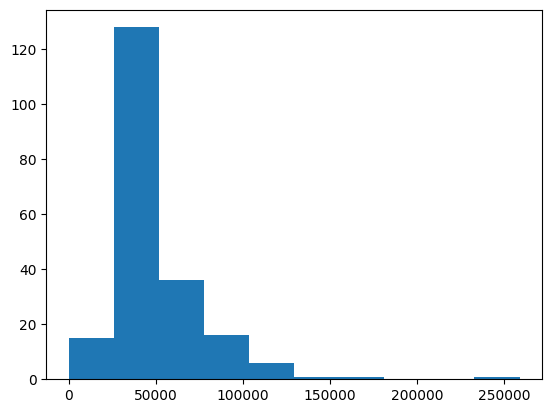

SKU1 - Price Discount (%)
10     0.44
32     0.44
34     0.44
39     0.44
57     0.44
70     0.44
84     0.44
91     0.44
96     0.44
115    0.44
122    0.44
139    0.44
150    0.44
151    0.44
172    0.45
188    0.44
Name: Price Discount (%), dtype: float64


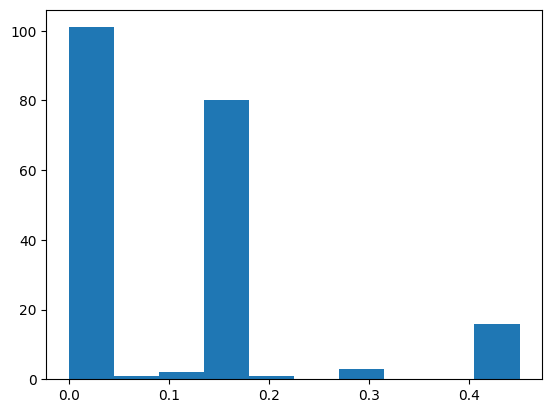

SKU1 - Google_Mobility
163   -15.70
164   -26.63
165   -28.49
166   -27.30
167   -24.28
168   -22.58
169   -18.18
170   -15.91
171   -15.27
184   -20.35
185   -19.41
186   -18.83
187   -16.44
Name: Google_Mobility, dtype: float64


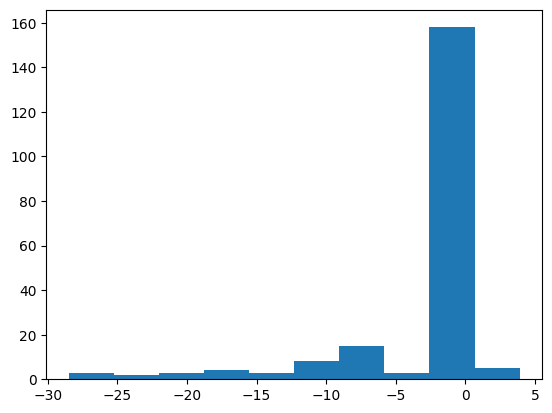

SKU2 - Sales
210    41915
219    52122
224    33566
242    40527
257    32549
270    41316
276    42002
291    32900
322    36674
328    37065
344    40111
350    39870
359    30409
388    34327
396    40169
Name: Sales, dtype: int64


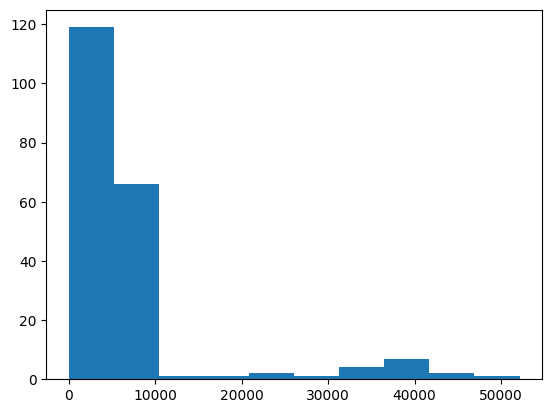

SKU2 - Price Discount (%)
210    0.5
219    0.5
224    0.5
242    0.5
257    0.5
265    0.5
270    0.5
276    0.5
291    0.5
311    0.5
322    0.5
328    0.5
344    0.5
350    0.5
359    0.5
388    0.5
396    0.5
400    0.5
Name: Price Discount (%), dtype: float64


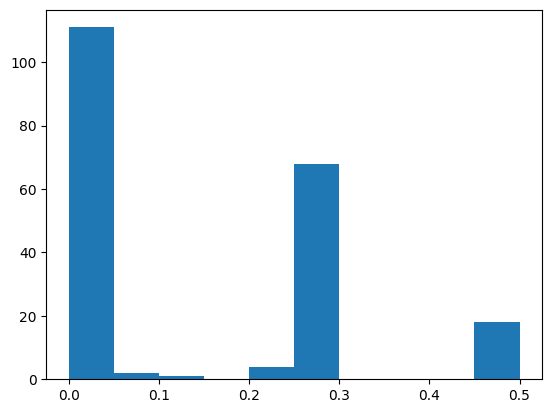

SKU2 - Google_Mobility
367   -15.70
368   -26.63
369   -28.49
370   -27.30
371   -24.28
372   -22.58
373   -18.18
374   -15.91
375   -15.27
388   -20.35
389   -19.41
390   -18.83
391   -16.44
Name: Google_Mobility, dtype: float64


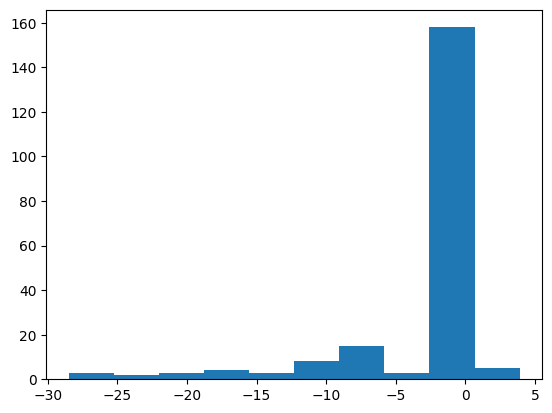

SKU3 - Sales
421    212245
426    248373
437    236242
447    212947
478    288322
494    237462
514    195088
530    197503
540    224723
546    207356
552    182891
566    187548
588    184365
592    189965
Name: Sales, dtype: int64


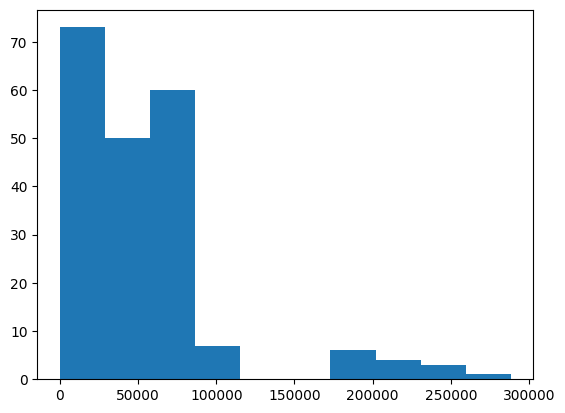

SKU3 - Price Discount (%)
Series([], Name: Price Discount (%), dtype: float64)


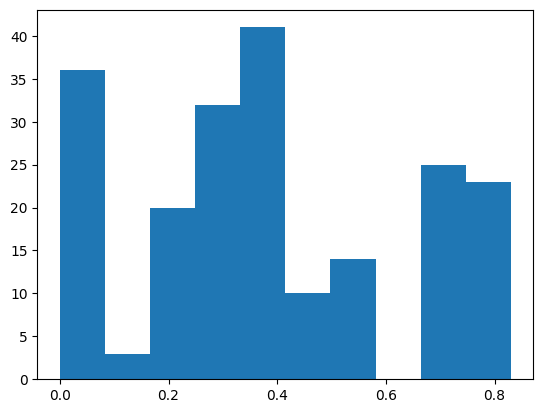

SKU3 - Google_Mobility
571   -15.70
572   -26.63
573   -28.49
574   -27.30
575   -24.28
576   -22.58
577   -18.18
578   -15.91
579   -15.27
592   -20.35
593   -19.41
594   -18.83
595   -16.44
Name: Google_Mobility, dtype: float64


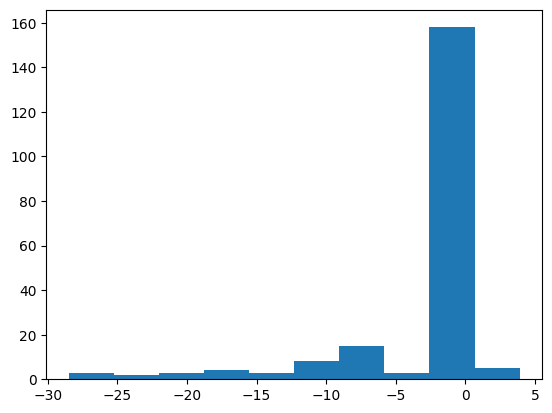

SKU4 - Sales
625    65464
630    63256
641    75377
651    69467
682    72261
698    66114
718    63842
734    59637
744    64115
750    56430
756    54996
770    58091
792    76346
796    81301
Name: Sales, dtype: int64


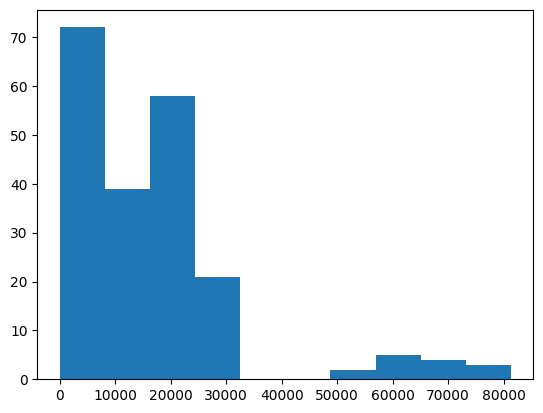

SKU4 - Price Discount (%)
Series([], Name: Price Discount (%), dtype: float64)


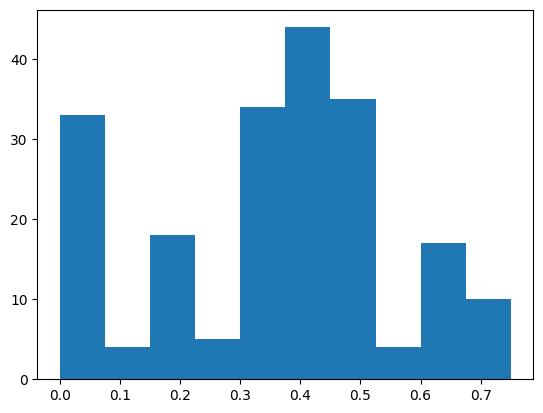

SKU4 - Google_Mobility
775   -15.70
776   -26.63
777   -28.49
778   -27.30
779   -24.28
780   -22.58
781   -18.18
782   -15.91
783   -15.27
796   -20.35
797   -19.41
798   -18.83
799   -16.44
Name: Google_Mobility, dtype: float64


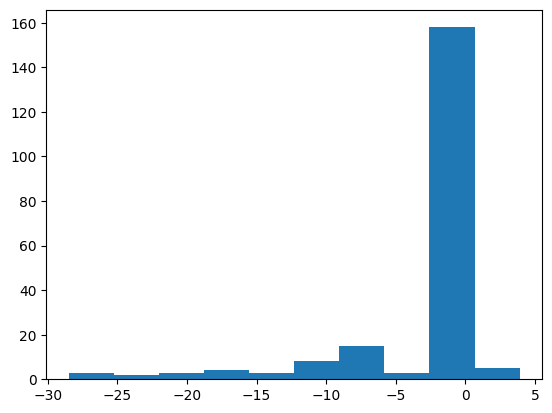

SKU5 - Sales
838    55905
844    73114
849    55567
856    50485
866    51114
885    55160
889    56275
934    47061
938    57064
941    61658
947    63644
952    56807
956    57496
987    61753
996    73058
Name: Sales, dtype: int64


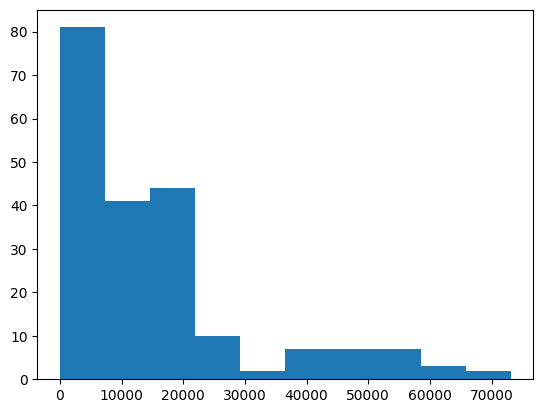

SKU5 - Price Discount (%)
Series([], Name: Price Discount (%), dtype: float64)


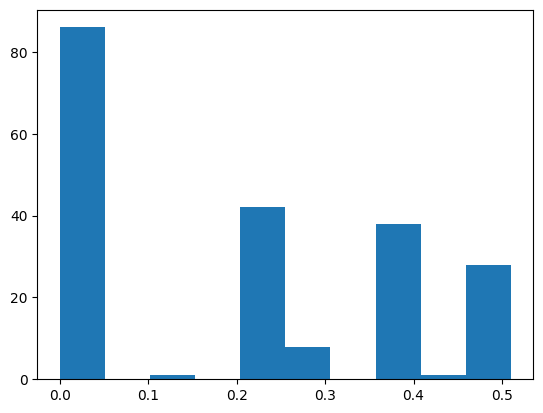

SKU5 - Google_Mobility
979    -15.70
980    -26.63
981    -28.49
982    -27.30
983    -24.28
984    -22.58
985    -18.18
986    -15.91
987    -15.27
1000   -20.35
1001   -19.41
1002   -18.83
1003   -16.44
Name: Google_Mobility, dtype: float64


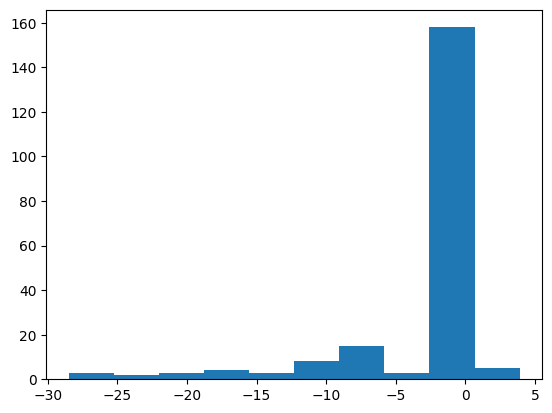

SKU6 - Sales
1025    118504
1037    142953
1041    131072
1046    118276
1053    129254
1057    154098
1058    241114
1089    128647
1105    127468
1109    140995
1110    181833
1161    138789
1162    143887
1163    163536
1214    115798
1215    152186
Name: Sales, dtype: int64


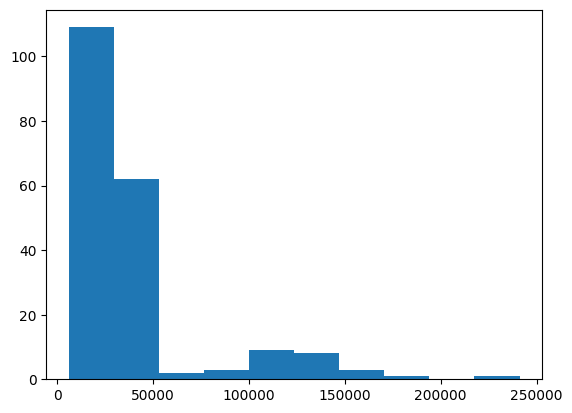

SKU6 - Price Discount (%)
1173    0.69
1175    0.69
1177    0.69
1179    0.69
1181    0.69
1183    0.69
Name: Price Discount (%), dtype: float64


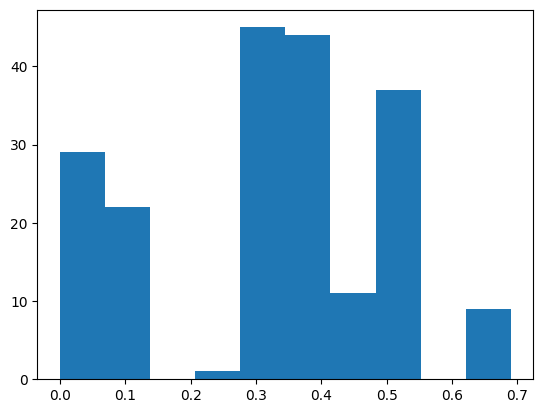

SKU6 - Google_Mobility
1183   -15.70
1184   -26.63
1185   -28.49
1186   -27.30
1187   -24.28
1188   -22.58
1189   -18.18
1190   -15.91
1191   -15.27
1204   -20.35
1205   -19.41
1206   -18.83
1207   -16.44
Name: Google_Mobility, dtype: float64


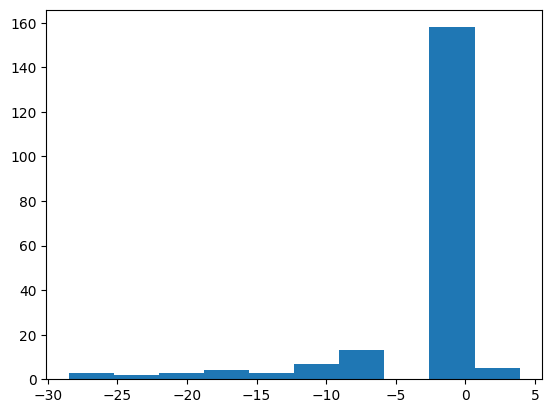

In [140]:
for i in range(1, 7):
    product = "SKU" + str(i)
    product_data = sales_data[sales_data["Product"] == product]
    for col in ["Sales", "Price Discount (%)", "Google_Mobility"]:
        col_data = product_data[col]
        z_scores = np.abs(stats.zscore(col_data.dropna()))
        outliers = np.where(z_scores > 2)[0]  # outliers have z-score > 2
        print(product, "-", col)
        print(product_data.iloc[outliers][col])
        plt.hist(col_data)
        plt.show()

We can see that for all products, `Sales` is right skewed and `Google_Mobility` is left skewed, while `Price Discount (%)` is more randomly scattered. There are some outliers in each category. We believe that since discount is scattered everwhere, and a lot of the outliers are actually the same value, so they are not truely outliers, but just the nature of the data. Therefore, we will not remove those. While for the other two columns, I believe we need to farther investigate into the patterns of the data before deciding whether they are truely outliers. If there are true outliers, we would want to replace with mean of the column. This is because each data point is important in analyzing the trends and we cannot simply remove columns with outliers.

Lets further investigate the data points of the two columns(Sales and Google_Mobility)  

In [141]:
sales_data.describe()

,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
count,1218,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,2019-01-13 02:04:08.275862016,30294.678982,0.251043,0.472085,0.212644,0.348933,-2.377406,0.226601,0.019704,0.019704,0.018883
min,2017-02-05 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,-28.490000,0.000000,0.000000,0.000000,0.000000
25%,2018-01-21 00:00:00,7212.750000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019-01-13 00:00:00,19742.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2020-01-05 00:00:00,40282.250000,0.400000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020-12-27 00:00:00,288322.000000,0.830000,1.000000,1.000000,1.000000,3.900000,1.000000,1.000000,1.000000,1.000000
std,NaN,35032.527297,0.215494,0.499425,0.409346,0.476828,5.806291,0.418804,0.139040,0.139040,0.136169


In the sales column, there is a huge difference between the mean and the 50th percentile, the maximum and 75th percentile this shows the right skewness of the data. The google mobility column is quite the opposite, the mean value being lower than the 50th percentile and min value is lower than 25th percentile showing the leftskewdness of the data, lets visualize below using box plot.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


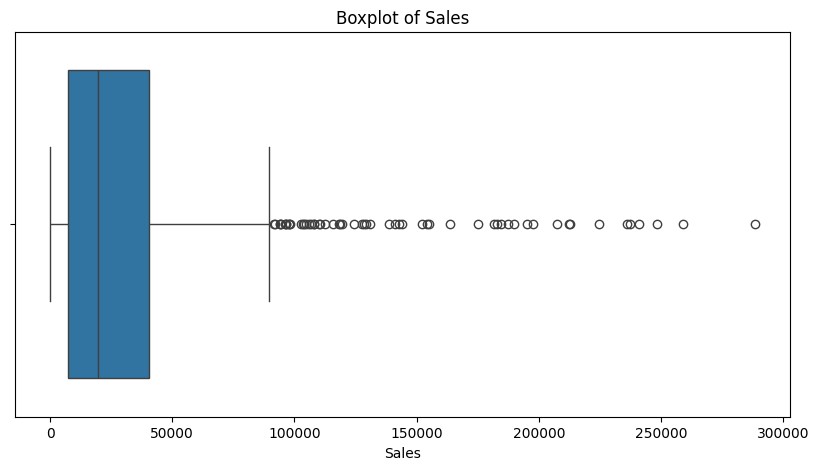

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


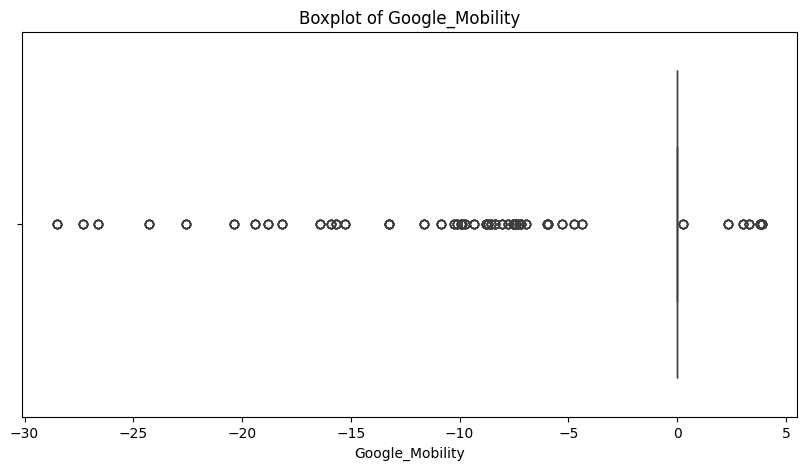

In [142]:
for col in ["Sales", "Google_Mobility"]:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=sales_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

**Google_mobility**

In [143]:
# checking for the minimum value

Google_Mobility_min = sales_data.loc[sales_data['Google_Mobility'].idxmin()]
Google_Mobility_min

Product                              SKU1
date                  2020-04-05 00:00:00
Sales                               39473
Price Discount (%)                   0.01
In-Store Promo                          0
Catalogue Promo                         1
Store End Promo                         0
Google_Mobility                    -28.49
Covid_Flag                              1
V_DAY                                   0
EASTER                                  0
CHRISTMAS                               0
Name: 165, dtype: object

In [172]:


GM_ascend = sales_data.sort_values(by='Google_Mobility', ascending= True)

GM_ascend


,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,transformed_cuberootgm,transformed_sqrtgm,sales_sqrt,log_sales,sales_interpolated,cuberoot_googlemobility
165,SKU1,2020-04-05,39473,0.01,0,1,0,-28.49,1,0,0,0,3.220121,5.778408,198.678132,10.583372,39473,3.220121
573,SKU3,2020-04-05,29350,0.67,0,1,0,-28.49,1,0,0,0,3.220121,5.778408,171.318417,10.287048,29350,3.220121
369,SKU2,2020-04-05,3719,0.01,0,0,0,-28.49,1,0,0,0,3.220121,5.778408,60.983604,8.221210,3719,3.220121
981,SKU5,2020-04-05,16928,0.25,0,1,0,-28.49,1,0,0,0,3.220121,5.778408,130.107648,9.736724,16928,3.220121
1185,SKU6,2020-04-05,9705,0.53,0,0,0,-28.49,1,0,0,0,3.220121,5.778408,98.513958,9.180396,9705,3.220121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,SKU5,2020-02-23,5666,0.00,0,0,0,3.90,1,0,0,0,1.000000,1.000000,75.272837,8.642239,5666,1.000000
159,SKU1,2020-02-23,29275,0.01,0,0,0,3.90,1,0,0,0,1.000000,1.000000,171.099386,10.284489,29275,1.000000
1179,SKU6,2020-02-23,24330,0.69,0,0,0,3.90,1,0,0,0,1.000000,1.000000,155.980768,10.099465,24330,1.000000
567,SKU3,2020-02-23,31172,0.74,0,1,0,3.90,1,0,0,0,1.000000,1.000000,176.555940,10.347276,31172,1.000000


Google mobility is highly affected by covid flag(which is binary, 1- yes and 0-no), the first five weeks that covid_flag was 1, the google mobilty was high then it dropped.Therefore, the leftskewness in the google mobility column arent truly outliers but was affected by the covid data.Below we will try few methods to normalize the data to reduce the skewness and maintain the parttern in our data. 

In [157]:
# applying the cube root transformation

sales_data['cuberoot_googlemobility'] = np.cbrt(sales_data['Google_Mobility'].max() + 1 - sales_data['Google_Mobility'])
sales_data['cuberoot_googlemobility']

0       1.698499
1       1.698499
2       1.698499
3       1.698499
4       1.698499
          ...   
1213    2.318316
1214    2.368691
1215    2.310225
1216    2.213825
1217    2.295770
Name: cuberoot_googlemobility, Length: 1218, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


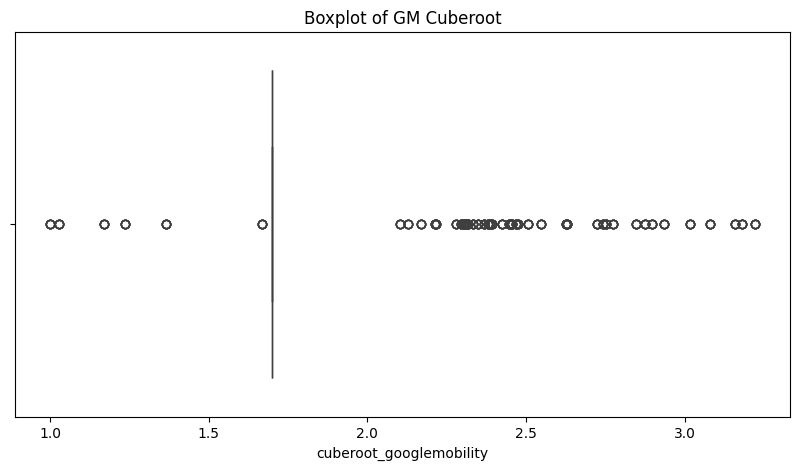

In [158]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=sales_data['cuberoot_googlemobility'])
plt.title('Boxplot of GM Cuberoot')
plt.show()

In [173]:
#Transforming the values using the squareroot method

sales_data['squareroot_googlemobility'] = np.sqrt(sales_data['Google_Mobility'].max() + 1 - sales_data['Google_Mobility'])
sales_data['squareroot_googlemobility']

0       2.213594
1       2.213594
2       2.213594
3       2.213594
4       2.213594
          ...   
1213    3.529873
1214    3.645545
1215    3.511410
1216    3.293934
1217    3.478505
Name: squareroot_googlemobility, Length: 1218, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


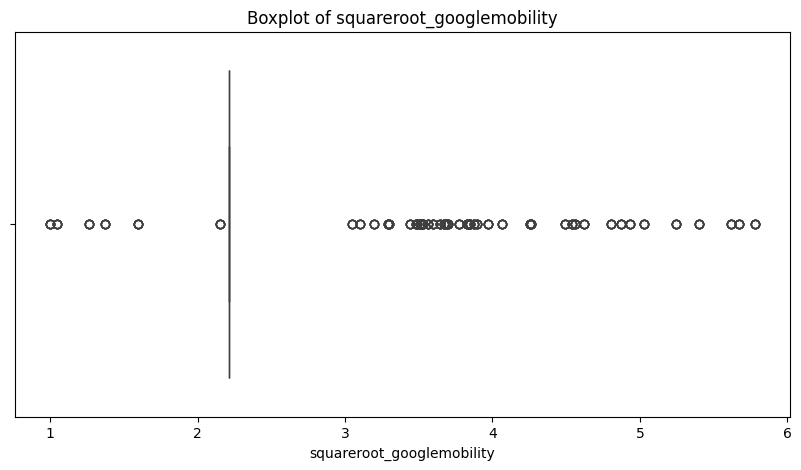

In [174]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=sales_data['squareroot_googlemobility'])
plt.title('Boxplot of squareroot_googlemobility')
plt.show()

**Sales**

In [149]:
max_sales = sales_data.loc[sales_data['Sales'].idxmax()]
max_sales

Product                                  SKU3
date                      2018-06-10 00:00:00
Sales                                  288322
Price Discount (%)                        0.5
In-Store Promo                              1
Catalogue Promo                             0
Store End Promo                             1
Google_Mobility                           0.0
Covid_Flag                                  0
V_DAY                                       0
EASTER                                      0
CHRISTMAS                                   0
transformed_cuberootgm               1.698499
transformed_sqrtgm                   2.213594
Name: 478, dtype: object

In [150]:
sales_desc = sales_data.sort_values(by='Sales', ascending=False)

sales_desc.head(15)

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,transformed_cuberootgm,transformed_sqrtgm
478,SKU3,2018-06-10,288322,0.50,1,0,1,0.00,0,0,0,0,1.698499,2.213594
150,SKU1,2019-12-22,258874,0.44,0,1,1,0.00,0,0,0,0,1.698499,2.213594
426,SKU3,2017-06-11,248373,0.50,1,0,1,0.00,0,0,0,0,1.698499,2.213594
1058,SKU6,2017-10-29,241114,0.53,1,0,0,0.00,0,0,0,0,1.698499,2.213594
494,SKU3,2018-09-30,237462,0.50,1,0,1,0.00,0,0,0,0,1.698499,2.213594
437,SKU3,2017-08-27,236242,0.50,1,0,1,0.00,0,0,0,0,1.698499,2.213594
540,SKU3,2019-08-18,224723,0.52,1,0,1,0.00,0,0,0,0,1.698499,2.213594
447,SKU3,2017-11-05,212947,0.50,1,0,1,0.00,0,0,0,0,1.698499,2.213594
421,SKU3,2017-05-07,212245,0.50,1,0,0,0.00,0,0,0,0,1.698499,2.213594
546,SKU3,2019-09-29,207356,0.54,1,0,1,0.00,0,0,0,0,1.698499,2.213594


From the above we can see that the sales are influenced by a few factors(the presence of promotions and the discount), also the SKU3 seems to sell alot. Therefore, we cannot treat this values as outliers but rather normalize them. 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


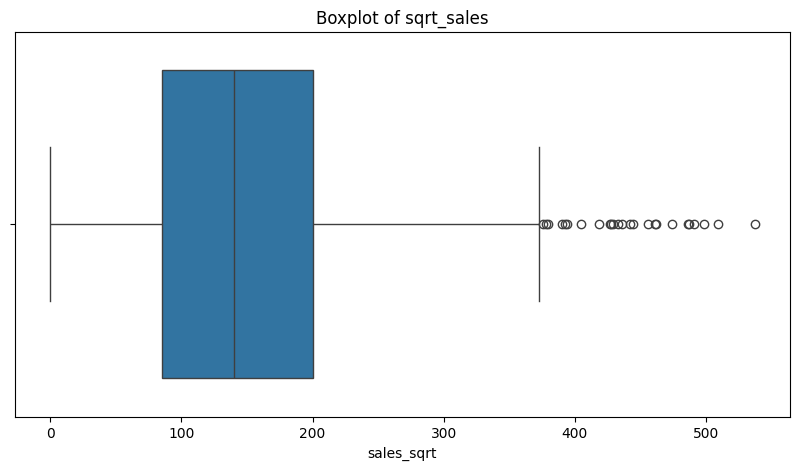

In [151]:
# normalizing the sales column using square roots and visualising

sales_data['sales_sqrt'] =np.sqrt(sales_data['Sales'])

plt.figure(figsize=(10, 5))
sns.boxplot(x=sales_data['sales_sqrt'])
plt.title('Boxplot of sqrt_sales')
plt.show()